# Social Network Purchase Prediction:

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import warnings
warnings.filterwarnings("ignore")

## Step 1 : Problem Statement

#### Predict whether a user in the social network will make a purchase based on their gender, age, and estimated salary, using a machine learning model trained on historical data.

## Step 2: Data Gathering

In [67]:
df = pd.read_csv(r"D:\Jupyter python\New Datasets\Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## Step 3: EDA

In [68]:
df.shape

(400, 5)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [70]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [71]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<Axes: >

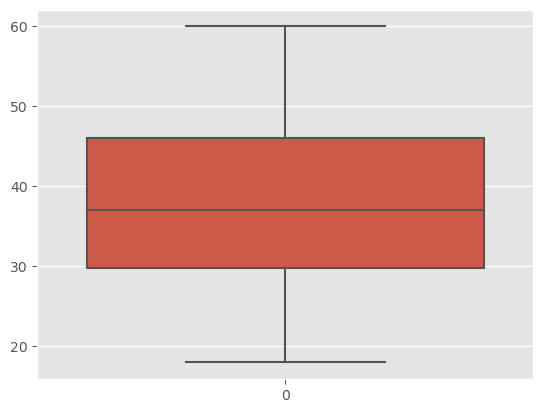

In [72]:
sns.boxplot(df["Age"])

## Step 4 : Feature Engineering

### To find outliers

In [73]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

lower_tail = Q1- 1.5 * IQR
upper_tail = Q3+ 1.5 * IQR

outliers = (df < lower_tail) | (df > upper_tail)
outliers_count = outliers.sum()
outliers_count

Age                0
EstimatedSalary    0
Gender             0
Purchased          0
User ID            0
dtype: int64

### Label Encodeing

In [78]:
df["Gender"] = df["Gender"].replace({"Male": 0, "Female": 1})

### Scaling

In [79]:
df["Gender"]

0      0
1      0
2      1
3      1
4      0
      ..
395    1
396    0
397    1
398    0
399    1
Name: Gender, Length: 400, dtype: int64

In [80]:
Std = StandardScaler()
Standard_array = Std.fit_transform(df.iloc[:,1:4])
Df_Std = pd.DataFrame(Standard_array, columns = df.iloc[:,1:4].columns)
Df_Std.head()

,Gender,Age,EstimatedSalary
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751


# Step 5 : Model training  

In [85]:
x = Df_Std
y = df["Purchased"]
x

,Gender,Age,EstimatedSalary
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751
...,...,...,...
395,0.980196,0.797057,-0.844019
396,-1.020204,1.274623,-1.372587
397,0.980196,1.179110,-1.460681
398,-1.020204,-0.158074,-1.078938


In [86]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [171]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.3, random_state = 0,stratify=y) 

### Using KNN

In [227]:
myKNN = KNeighborsClassifier(n_neighbors = 1)

In [228]:
myKNN.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=1)

## Step 6: Model Evaluation

### Training

In [229]:
y_predict = myKNN.predict(xtrain)

In [248]:
accuracy = accuracy_score(ytrain,y_predict)
print(f"Accuracy : {accuracy}")

Training_confusion_matrix = confusion_matrix(ytrain,y_predict)
print(Training_confusion_matrix)

Training_confusion_report = classification_report(ytrain,y_predict)
print(Training_confusion_report)

Accuracy : 1.0
[[180   0]
 [  0 100]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00       100

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280



### Testing

In [249]:
ytest_pred = myKNN.predict(xtest)
ytest_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [247]:
accuracy = accuracy_score(ytest,ytest_pred)
print(f"Accuracy : {accuracy}")

testing_confusion_matrix = confusion_matrix(ytest,ytest_pred)
print(testing_confusion_matrix)

testing_confusion_report = classification_report(ytest,ytest_pred)
print(testing_confusion_report)

Accuracy : 0.8416666666666667
[[67 10]
 [ 9 34]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88        77
           1       0.77      0.79      0.78        43

    accuracy                           0.84       120
   macro avg       0.83      0.83      0.83       120
weighted avg       0.84      0.84      0.84       120



## Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.

In [235]:
err_rates = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xtrain, ytrain)
    pred_i = knn.predict(xtest)
    err_rates.append(np.mean(ytest != pred_i))

Text(0.5, 1.0, 'Error Rate vs K-value')

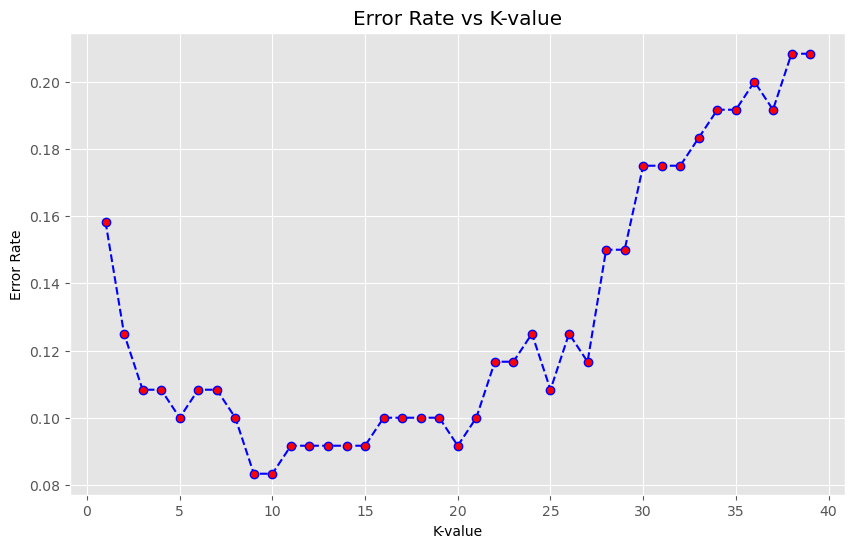

In [236]:
plt.style.use('ggplot')
plt.subplots(figsize = (10,6))
plt.plot(range(1,40), err_rates, linestyle = 'dashed', color = 'blue', marker = 'o', markerfacecolor = 'red')
plt.xlabel('K-value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K-value')

## Retrain with new K Value
Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.

In [237]:
KNN_New = KNeighborsClassifier(n_neighbors = 8)

In [238]:
KNN_New.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=8)

### Training

In [239]:
y_trainpred = KNN_New.predict(xtrain)

In [240]:
accuracy_train = accuracy_score(ytrain,y_trainpred)
print(f"Accuracy : {accuracy_train}")

confusion_matrix_train = confusion_matrix(ytrain,y_trainpred)
print(confusion_matrix_train)

confusion_report_train = classification_report(ytrain,y_trainpred)
print(confusion_report_train)

Accuracy : 0.9214285714285714
[[169  11]
 [ 11  89]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       180
           1       0.89      0.89      0.89       100

    accuracy                           0.92       280
   macro avg       0.91      0.91      0.91       280
weighted avg       0.92      0.92      0.92       280



### Testing

In [241]:
y_testpred = KNN_New.predict(xtest)
y_testpred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [242]:
accuracy_test = accuracy_score(ytest,y_testpred)
print(f"Accuracy : {accuracy_test}")

confusion_matrix_test = confusion_matrix(ytest,y_testpred)
print(confusion_matrix_test)

confusion_report_test = classification_report(ytest,y_testpred)
print(confusion_report_test)

Accuracy : 0.9
[[71  6]
 [ 6 37]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        77
           1       0.86      0.86      0.86        43

    accuracy                           0.90       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.90      0.90      0.90       120



### Visualizing the Training set result:

In [261]:
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix

# Assuming KNN_New is your trained KNN model
y_pred = KNN_New.predict(xtrain)

# Create a confusion matrix
cm = confusion_matrix(ytrain, y_pred)

# Create a plotly heatmap
z = cm[::-1]  # Reverse the confusion matrix to match the layout
fig = ff.create_annotated_heatmap(z, x=['Predicted 0', 'Predicted 1'], y=['Actual 1', 'Actual 0'],
                                  colorscale='Viridis')

# Update layout for better visualization
fig.update_layout(
    title='Confusion Matrix',
    xaxis=dict(title='Predicted Label'),
    yaxis=dict(title='True Label'),
)

# Show the plot
fig.show()
